# Programing exercise 1: Single particle in a 1D potential

Due on Monday, 29.10.2018, 14.15h

### Total: 100 points

## Defining the problem

We want to calculate the eigenenergies and eigenfunction of a quantum particle in a on-dimensional potential, i.e. solve the eigenvalue problem

$$\left[\frac{1}{2} \partial_{x}^2 + V(x)\right] \phi(x) = E \phi(x)$$

by representing the wave function $\phi(x)$ on a discrete spatial grid.

In [51]:
# load standard libraries
import numpy as np   
import matplotlib.pyplot as plt   
%matplotlib inline
from ipywidgets import interactive

#Plot settings
plt.style.use('classic')
plt.rcParams["font.family"]='serif'
plt.rcParams["figure.figsize"][0] = 14
plt.rcParams["figure.figsize"][1] = 9

### Exercise 1 (25 points)

Solve the eigenproblem using numpys.linalg.eig().
Use a grid size of 20 length units and 401 gridpoints as a test case and plot the eigenfunctions.

In [2]:
#Simplifying the problem by setting some variables to 1
hbar=1
m=1
omega=1

#defining potential of the harmonic oscillator 
def potential(x):
    return 0.5*m*omega**2*x**2

#defining the grid structure 
L = 20
N = 401
grid = np.linspace(-L/2,L/2,N)

delta_x = L/N

#Writing down the Hamiltonian as a tridiagonal matrix

def Hamiltonian():
    maindiag = potential(grid) + 1/delta_x**2
    nextdiag = -1/(2*delta_x**2)*np.ones(len(grid)-1)
    H = np.diag(maindiag) + np.diag(nextdiag,-1) + np.diag(nextdiag,1)
    return H

print("The Hamiltonian for this problem has the following structure:")
print()
print(Hamiltonian())

The Hamiltonian for this problem has the following structure:

[[ 452.0025  -201.00125    0.      ...,    0.         0.         0.     ]
 [-201.00125  451.50375 -201.00125 ...,    0.         0.         0.     ]
 [   0.      -201.00125  451.0075  ...,    0.         0.         0.     ]
 ..., 
 [   0.         0.         0.      ...,  451.0075  -201.00125    0.     ]
 [   0.         0.         0.      ..., -201.00125  451.50375 -201.00125]
 [   0.         0.         0.      ...,    0.      -201.00125  452.0025 ]]


In [54]:
plt.rcParams["figure.figsize"][0] = 20

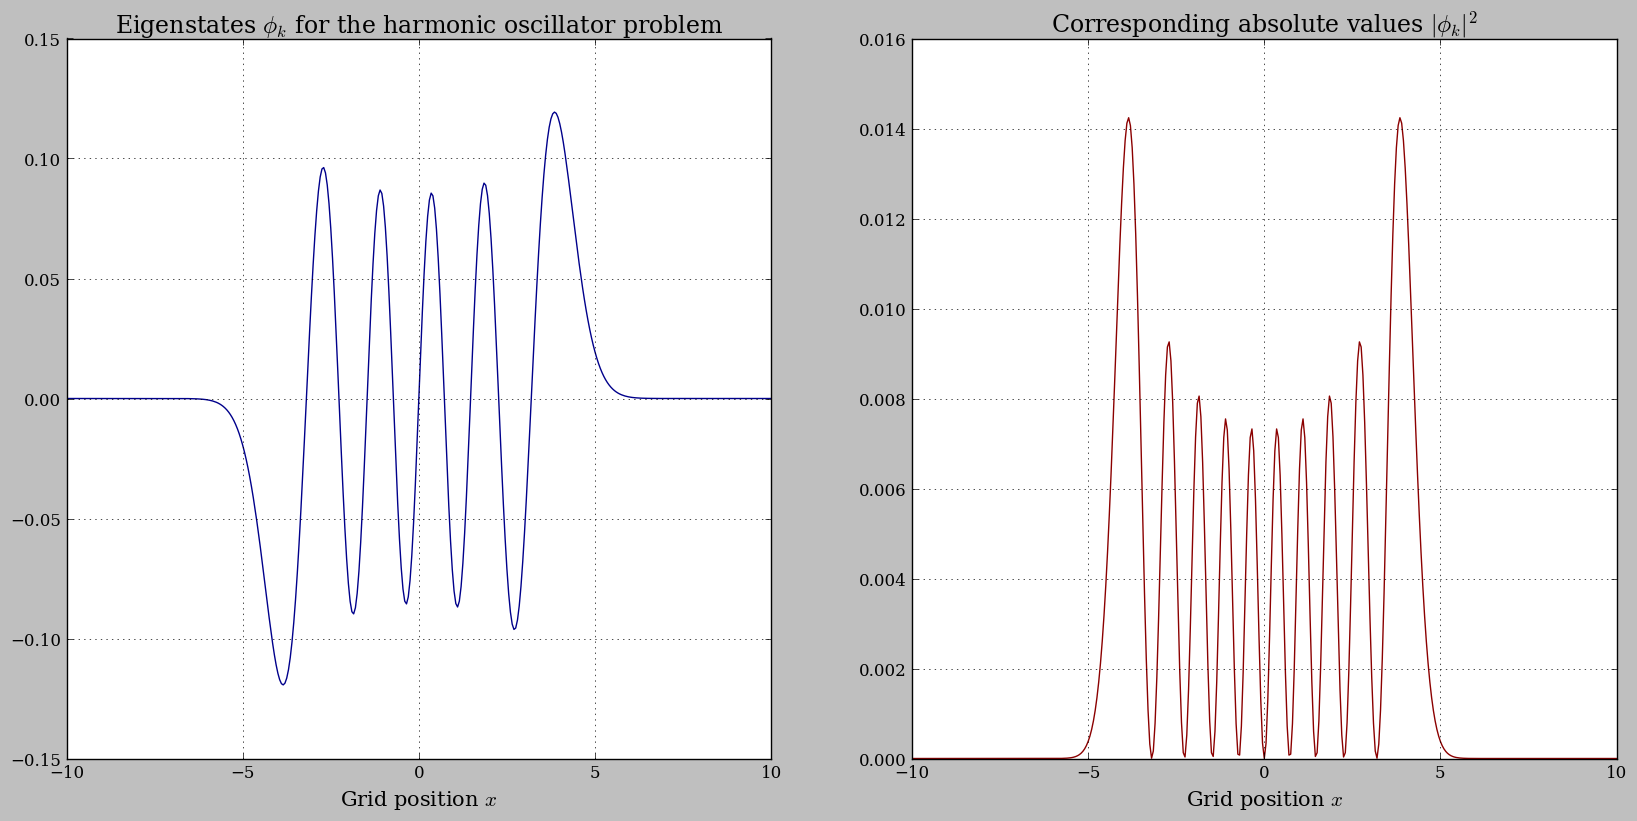

In [55]:
#Diagonalize the Hamiltonian to solve the eigenvalue problem
energies, states = np.linalg.eig(Hamiltonian())

#Sorting the results
energy_index = np.argsort(energies)

#Plotting the final result
def eigenfunctions(k,signum):
    """
    The second option 'signum' gives us the possibility to correct the signs of the wave functions
    which sometimes have been swapped during the diagonalization process in exercise one.
    Simply change signum to +1 or -1 until both images have the same orientation.
    """
    plt.subplot(121)
    plt.plot(grid,signum*states[:,energy_index[k]],color = 'darkblue')
    plt.title(r'Eigenstates $\phi_k$ for the harmonic oscillator problem' , size = 17)
    plt.xlabel('Grid position $x$',size = 15)
    plt.grid(True)
    
    plt.subplot(122)
    plt.plot(grid,np.abs(states[:,energy_index[k]])**2, color = 'darkred')
    plt.title(r'Corresponding absolute values $|\phi_k|^2$' , size = 17)
    plt.xlabel('Grid position $x$',size = 15)
    plt.grid(True)
    
    plt.show
    
interactive(eigenfunctions,k=(0,19),signum=(-1,1,2))

### Exercise 2 (15 points)

Check the convergence of the numerical solutions with respect to grid size and spacing. Compare the eigenvalues and eigenfunction to analytical solutions. You may find the function scipy.special.hermite(...) useful.

In [56]:
from scipy.special import hermite 
from math import factorial as fact

#Exact solutions for the harmonic oscillator
def phi_exact(k,x): #k is a natural number representing the exitation state
    f = hermite(k)
    return 1/np.sqrt(2**k*fact(k)*np.sqrt(np.pi))*f(x)*np.exp(-x**2/2)

def energy_exact(k):
    return hbar*omega*(k+1/2)

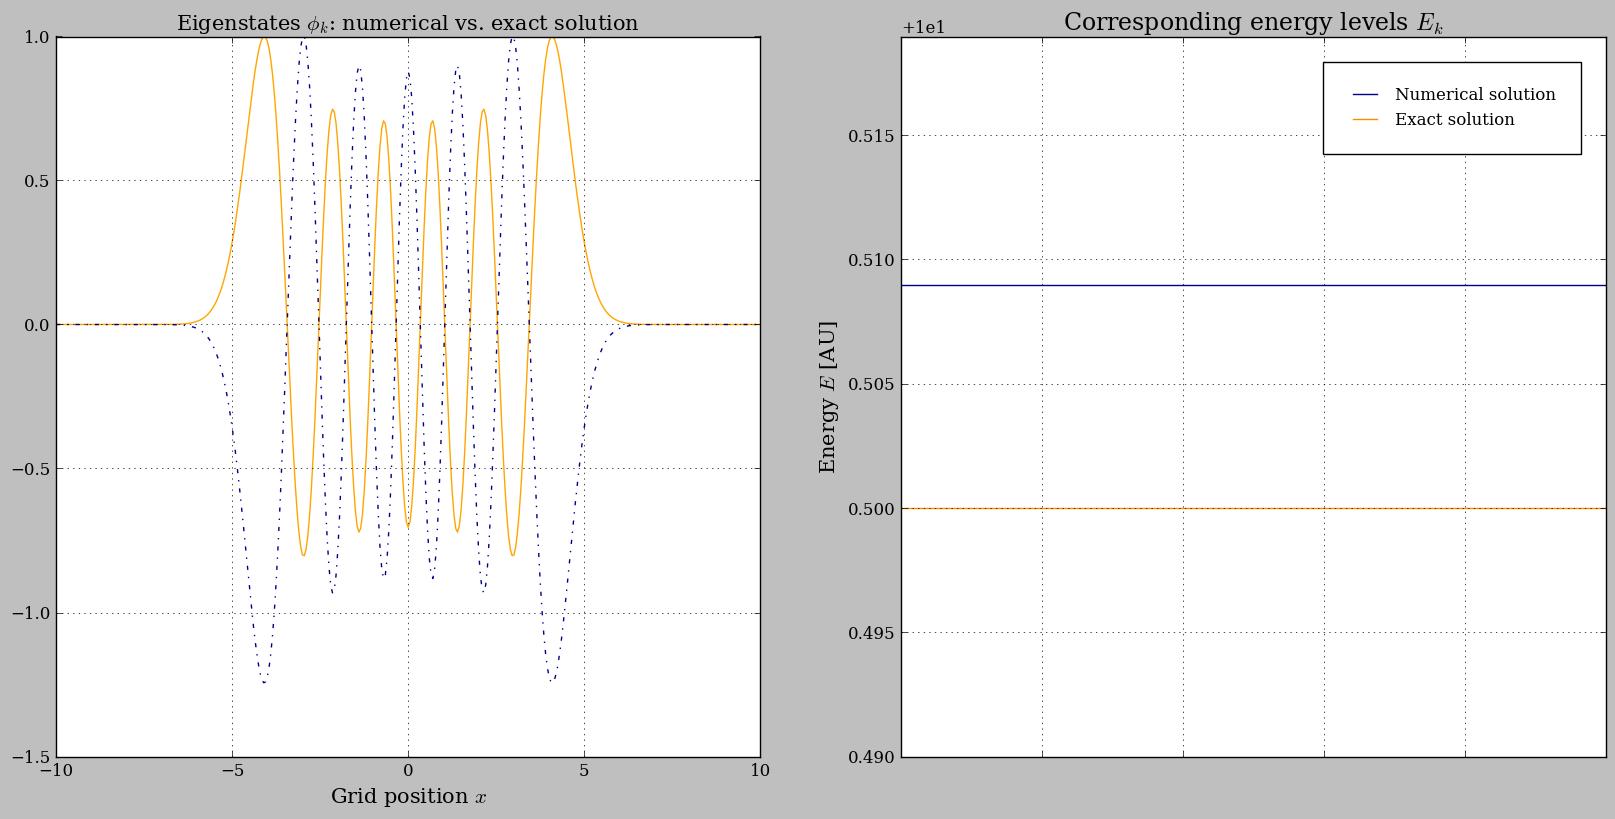

In [57]:
#Plotting the results from exercise 1 in comparison with the exact (known) solution
def comparison(k,signum):
    plt.subplot(121)
    #Normalizing both curves with the respective maximum for better comparability
    plt.plot(grid,phi_exact(k,grid)/max(phi_exact(k,grid)), color = 'orange')
    plt.plot(grid,signum*states[:,energy_index[k]]/max(signum*states[:,energy_index[k]]),color = 'darkblue',
             ls = '-.')
    plt.title(r'Eigenstates $\phi_k$: numerical vs. exact solution' , size = 15)
    plt.xlabel('Grid position $x$',size = 15)
    plt.grid(True)
    

    
    plt.subplot(122)
    plt.plot(np.linspace(0,1,2),(energies[energy_index[k]],energies[energy_index[k]]), color = 'darkblue',
             label= r'Numerical solution')
    plt.plot(np.linspace(0,1,2),(energy_exact(k),energy_exact(k)), color = 'darkorange',
            label= r'Exact solution')
    plt.title(r'Corresponding energy levels $E_k$' , size = 17)
    plt.ylabel('Energy $E$ [AU]',size = 15)
    plt.ylim(min(energies[energy_index[k]],energy_exact(k))-0.01,max(energies[energy_index[k]],energy_exact(k))+0.01)
    plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0],[' ',' ',' ',' ',' ',' '])
    plt.grid(True)
    plt.legend(frameon=True,fontsize='medium', borderpad=1.5, borderaxespad=1.5,loc='best')

    plt.show
    
interactive(comparison,k=(0,20),signum=(-1,1,2))

#### In the following cell I tried out some different grid settings. The results are discussed at the end of the exercise.

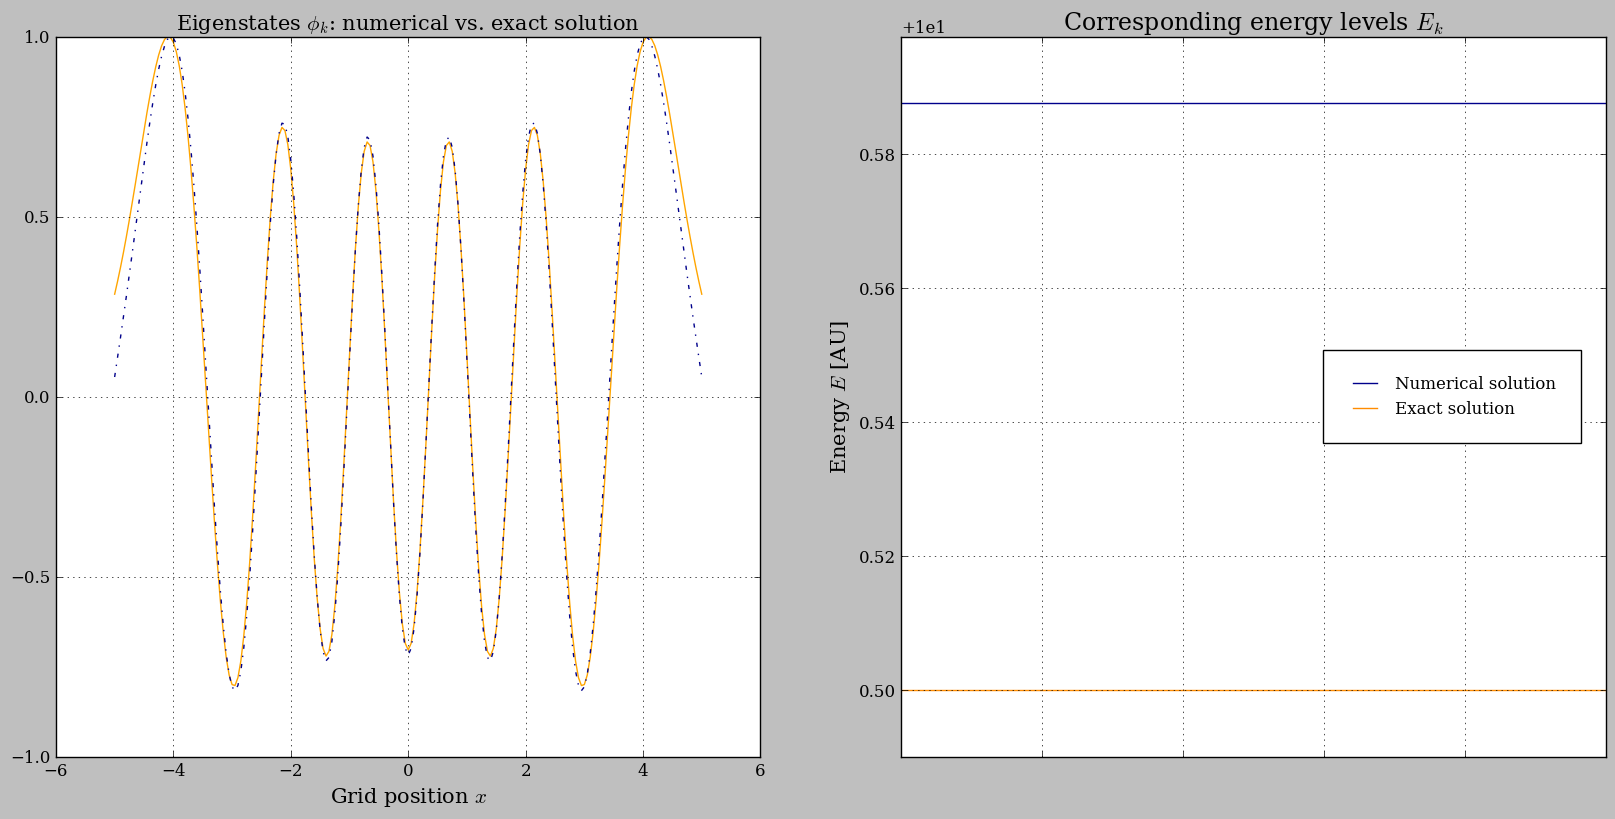

In [58]:
testgrid = np.linspace(-L/4,L/4,201) #smaller domain

def Hamiltonian_small():
    maindiag = potential(testgrid) + 1/delta_x**2
    nextdiag = -1/(2*delta_x**2)*np.ones(len(testgrid)-1)
    H = np.diag(maindiag) + np.diag(nextdiag,-1) + np.diag(nextdiag,1)
    return H

#Diagonalize the Hamiltonian to solve the eigenvalue problem
energies_small, states_small = np.linalg.eig(Hamiltonian_small())

#Sorting the results
energy_index_small = np.argsort(energies_small)

def comparison2(k,signum):
    """
    The second option 'signum' gives us the possibility to correct the signs of the wave functions
    which sometimes have been swapped during the diagonalization process in exercise one.
    Simply change signum to +1 or -1 until both images have the same orientation.
    """
    plt.subplot(121)
    #Normalizing both curves with the respective maximum for better comparability
    plt.plot(testgrid,phi_exact(k,testgrid)/max(phi_exact(k,testgrid)), color = 'orange')
    plt.plot(testgrid,signum*states_small[:,energy_index_small[k]]/max(signum*states_small[:,energy_index_small[k]]),
             color = 'darkblue',ls = '-.')
    plt.title(r'Eigenstates $\phi_k$: numerical vs. exact solution' , size = 15)
    plt.xlabel('Grid position $x$',size = 15)
    plt.grid(True)
    

    
    plt.subplot(122)
    plt.plot(np.linspace(0,1,2),(energies_small[energy_index_small[k]],energies_small[energy_index_small[k]]), color = 'darkblue',
             label= r'Numerical solution')
    plt.plot(np.linspace(0,1,2),(energy_exact(k),energy_exact(k)), color = 'darkorange',
            label= r'Exact solution')
    plt.title(r'Corresponding energy levels $E_k$' , size = 17)
    plt.ylabel('Energy $E$ [AU]',size = 15)
    plt.ylim(min(energies_small[energy_index_small[k]],energy_exact(k))-0.01,
             max(energies_small[energy_index_small[k]],energy_exact(k))+0.01)
    plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0],[' ',' ',' ',' ',' ',' '])
    plt.grid(True)
    plt.legend(frameon=True,fontsize='medium', borderpad=1.5, borderaxespad=1.5,loc='best')

    plt.show
    
interactive(comparison2,k=(0,20),signum=(-1,1,2))

### Summary of the results:

- In the first plot we can see that the numerical solution fits well with the theoretical expectation. I normalized both curves with respect to their maximum for better comparability. The different normalization of the wave functions is due to the fact that the theoretical curve is normalized via the integral over the squared absolute value, whereas the numerical solution is a normalized vector, meaning that the sum of the squared entries equals $1$ or $1^2$ (= the same ;-) ). This could be seen as the integral over the squared function with a different x-axis consisting of the indices of the array. That is what I did.

- In the second plot I played around with some different values for the total number of gridpoints and the domain. As result I can conclude that the result is a lot less precise when we reduce the number of gridpoints for the same domain. This is also the case when we have more gridpoints than in the "average" case ($N=401$). In this case it is still a lot more precisely than in the case of fewer gridpoints.

- The same result occurs for larger or smaller grid domains with $N=401$ gridpoints. I found out, that for example if we double the domain and then double the total number of gridpoints, the results is again almost perfectly matched with the exact prediction.

- As my final result I can conclude, that there has to be some "perfect ratio" between the domain size and the total number of gridpoints to obtain a good result. In our case the given test values ($L=20, N=401$) seem to be a solid choice!

### Exercise 3 (15 points)

How does the runtime scale with the basis size (number of grid points)? (For example increase the number of gridpoints from 101 to 1601 in steps of 100) Interpret the result. How does it scale with the number of gridpoints? 

In [59]:
import time

#Defining the different qrid size options
gridsizes = np.linspace(101,1601,16)

runtimes = []
for size in gridsizes:
    grid2 = np.linspace(-L/2,L/2,size)
    delta_x2 = L/size
    def Hamiltonian2():
        maindiag = potential(grid2) + 1/(delta_x2**2)*np.ones(len(grid2))
        nextdiag = -1/(2*delta_x2**2)*np.ones(len(grid2)-1)
        return np.diag(maindiag) + np.diag(nextdiag,-1) + np.diag(nextdiag,1)
    #Diagonalizing the new Hamiltonians
    t1 = time.time()
    eigenvalues, eigenvectors = np.linalg.eig(Hamiltonian2())    
    t2 = time.time()
    #Saving time data
    runtimes.append(t2-t1)   

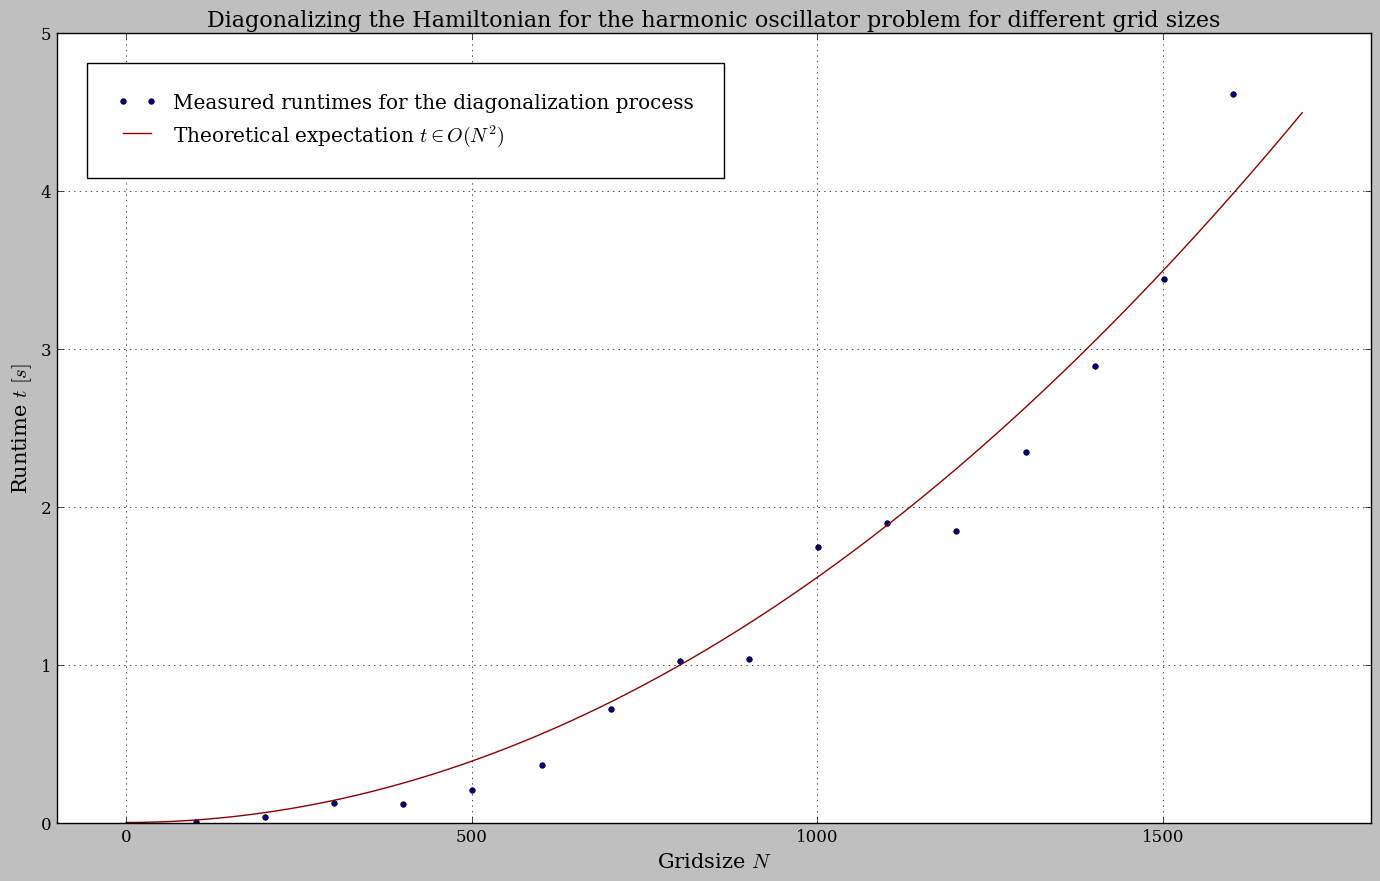

In [60]:
from scipy.optimize import curve_fit
plt.rcParams["figure.figsize"][0] = 14

#Theoretical expectation
def quadratic_curve(x,a):
    return a*x**2 
popt,pcov = curve_fit(quadratic_curve, gridsizes, runtimes)

#Plotting the result and comparing it to the expected relation
plt.plot(gridsizes,runtimes,color='darkblue', ls='', markersize='4', marker = 'o', label='Measured runtimes for the diagonalization process')
plt.plot(np.linspace(0,1701,1000),quadratic_curve(np.linspace(0,1701,1000),*popt),color='darkred', label= r'Theoretical expectation $t \in O(N^2)$ ')
plt.xlim(-100,1800)
plt.title('Diagonalizing the Hamiltonian for the harmonic oscillator problem for different grid sizes', size=16)
plt.xlabel(r'Gridsize $N$',size=15)
plt.ylabel(r'Runtime $t \ [s]$',size=15)
plt.grid(True)
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')

#Saving the output
plt.tight_layout()
plt.savefig('Plots/runtimes.pdf', format='PDF')

### Interpretation:

As we have already seen in the lecture we expect the resulting time for the diagonalization process to be in $\mathcal{O}(N^2).$ For a better comparability I added the theoretical $N^2$ curve in the plot.

### Exercise 4 (20 points)

Calculate only the lowest (e.g. 20) eigenvalues, using sparse matrices. Compare the runtime to your previous implementation. For diagonalising a sparse symmetric matrix, you can use scipy.sparse.linalg.eigsh(...)

In [61]:
import scipy.sparse as sparse


#Defining the Hamiltonian as a sparse matrix
def Hamiltonian_sparse():
    maindiag = potential(grid) + 1/delta_x**2
    nextdiag = -1/(2*delta_x**2)*np.ones(len(grid)-1)
    data = np.vstack((maindiag,np.hstack(([0],nextdiag)),np.hstack((nextdiag,[0]))))
    offsets = np.array([0, 1, -1])
    H = sparse.dia_matrix((data, offsets), shape=(len(maindiag),len(maindiag)))
    return H

print("The Hamiltonian implemented as sparse matrix has the following structure:")
print()
print(Hamiltonian_sparse())

The Hamiltonian implemented as sparse matrix has the following structure:

  (0, 0)	452.0025
  (1, 1)	451.50375
  (2, 2)	451.0075
  (3, 3)	450.51375
  (4, 4)	450.0225
  (5, 5)	449.53375
  (6, 6)	449.0475
  (7, 7)	448.56375
  (8, 8)	448.0825
  (9, 9)	447.60375
  (10, 10)	447.1275
  (11, 11)	446.65375
  (12, 12)	446.1825
  (13, 13)	445.71375
  (14, 14)	445.2475
  (15, 15)	444.78375
  (16, 16)	444.3225
  (17, 17)	443.86375
  (18, 18)	443.4075
  (19, 19)	442.95375
  (20, 20)	442.5025
  (21, 21)	442.05375
  (22, 22)	441.6075
  (23, 23)	441.16375
  (24, 24)	440.7225
  :	:
  (376, 375)	-201.00125
  (377, 376)	-201.00125
  (378, 377)	-201.00125
  (379, 378)	-201.00125
  (380, 379)	-201.00125
  (381, 380)	-201.00125
  (382, 381)	-201.00125
  (383, 382)	-201.00125
  (384, 383)	-201.00125
  (385, 384)	-201.00125
  (386, 385)	-201.00125
  (387, 386)	-201.00125
  (388, 387)	-201.00125
  (389, 388)	-201.00125
  (390, 389)	-201.00125
  (391, 390)	-201.00125
  (392, 391)	-201.00125
  (393, 392)	-201.0

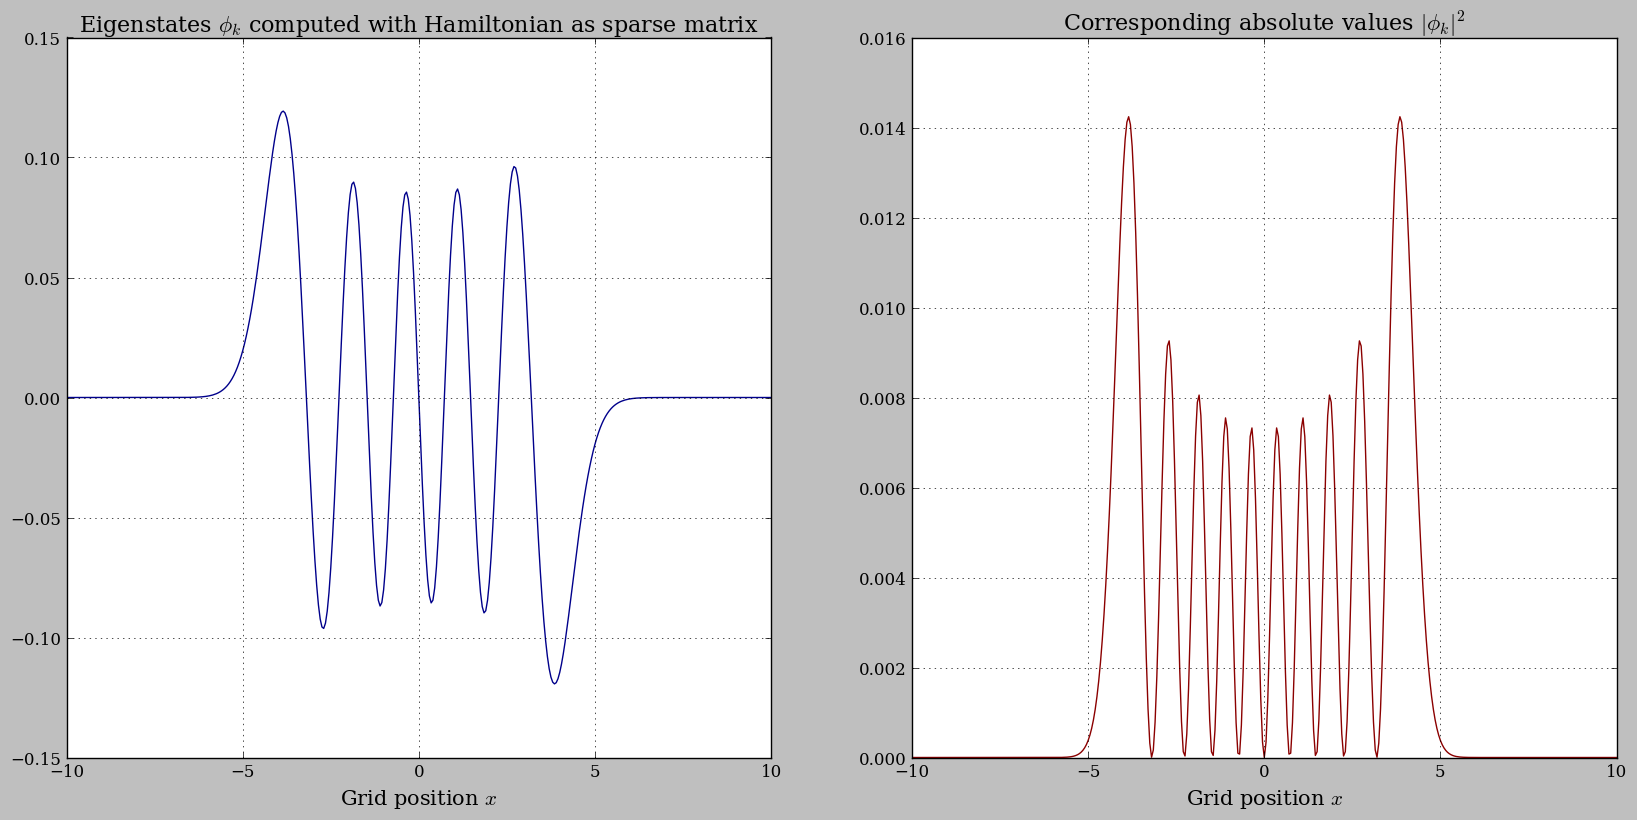

In [62]:
plt.rcParams["figure.figsize"][0] = 20

#Diagonalizing the resulting sparse matrix
energies_sparse, states_sparse = sparse.linalg.eigsh(Hamiltonian_sparse(),20, which='SM') #the 20 smallest eigvals

#Plotting the final result
def eigenfunctions_sparse(k):
    plt.subplot(121)
    plt.plot(grid,states_sparse[:,k],color = 'darkblue')
    plt.title(r'Eigenstates $\phi_k$ computed with Hamiltonian as sparse matrix' , size = 16)
    plt.xlabel('Grid position $x$',size = 15)
    plt.grid(True)
    
    plt.subplot(122)
    plt.plot(grid,np.abs(states_sparse[:,k])**2, color = 'darkred')
    plt.title(r'Corresponding absolute values $|\phi_k|^2$' , size = 16)
    plt.xlabel('Grid position $x$',size = 15)
    plt.grid(True)
    
    plt.show
    
interactive(eigenfunctions_sparse,k=(0,19))

In [63]:
#Now we compare the runtimes from exercise 3 with the ones from the sparse matrix method used above

#Recalculating the eigvals from exercise1 with the same method as in exercise 4 -> better comparability
runtimes_classic = []
for size in gridsizes:
    grid2 = np.linspace(-L/2,L/2,size)
    delta_x2 = L/size
    def Hamiltonian_classic():
        maindiag = potential(grid2) + 1/(delta_x2**2)*np.ones(len(grid2))
        nextdiag = -1/(2*delta_x2**2)*np.ones(len(grid2)-1)
        return np.diag(maindiag) + np.diag(nextdiag,-1) + np.diag(nextdiag,1)
    #Diagonalizing the classic Hamiltonians
    t1 = time.time()
    eigenvalues, eigenvectors = sparse.linalg.eigsh(Hamiltonian_classic(),20, which='SM')     
    t2 = time.time()
    #Saving time data
    runtimes_classic.append(t2-t1)  

#time measurement for the sparse matrix method
runtimes_sparse = []
for size in gridsizes:
    grid2 = np.linspace(-L/2,L/2,size)
    delta_x2 = L/size
    def Hamiltonian_sparse2():
        maindiag = potential(grid2) + 1/delta_x2**2
        nextdiag = -1/(2*delta_x2**2)*np.ones(len(grid2)-1)
        data = np.vstack((maindiag,np.hstack(([0],nextdiag)),np.hstack((nextdiag,[0]))))
        offsets = np.array([0, 1, -1])
        return sparse.dia_matrix((data, offsets), shape=(len(maindiag),len(maindiag)))
    #Diagonalizing the Hamiltonians computed as sparse matrix
    t1 = time.time()
    eigenvalues, eigenvectors = sparse.linalg.eigsh(Hamiltonian_sparse2(),20, which='SM')   
    t2 = time.time()
    #Saving time data
    runtimes_sparse.append(t2-t1)   

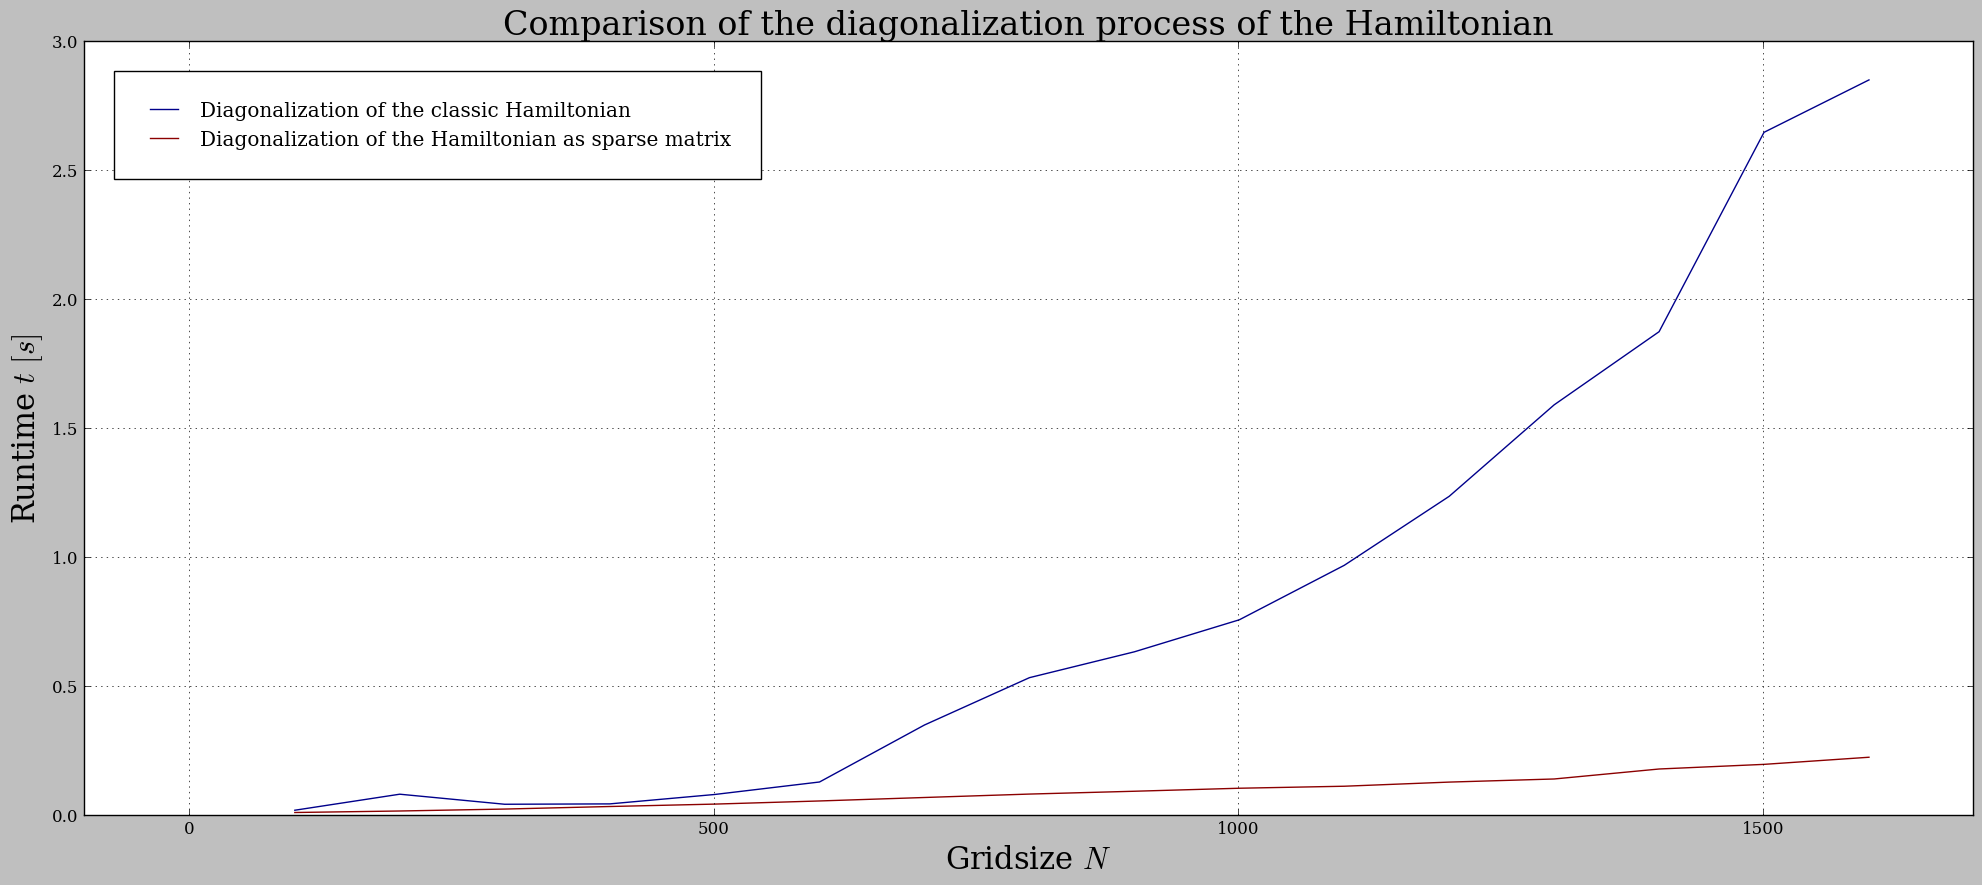

In [64]:
#Plotting the result and comparing both methods
plt.plot(gridsizes,runtimes_classic,color='darkblue', markersize='4', label='Diagonalization of the classic Hamiltonian')
plt.plot(gridsizes,runtimes_sparse,color='darkred', markersize='4', label='Diagonalization of the Hamiltonian as sparse matrix')

plt.xlim(-100,1700)
plt.title('Comparison of the diagonalization process of the Hamiltonian', size=24)
plt.xlabel(r'Gridsize $N$',size=22)
plt.ylabel(r'Runtime $t \ [s]$',size=22)
#plt.yscale('log')
plt.grid(True)
plt.legend(frameon=True,fontsize='large', borderpad=1.5, borderaxespad=1.5,loc='best')

#Saving the output
plt.tight_layout()
plt.savefig('Plots/runtimes2.pdf', format='PDF')

### Interpretation:

As we can easily see in the plot above the diagonalization process for the sparse matrix method takes a lot less time compared to the classic method, especially for larger grid sizes. This is due to the fact, that independently of the size of the matrix the sparse matrix only stores all the non-zero values, which are in our case all the entries on the main diagonal and the diagonals next to it ( $N + 2*(N-1)$ entries) compared to the $N^2$ entries that have to be checked in the classic method.

### Exercise 5 (15 points)

Implement the time evolution of superpositions of eigenstates as initial states. Hint: Read about broadcasting rules in python. Animate the time evolution using the framework sketched below:

In [ ]:
from matplotlib import animation
%matplotlib notebook
plt.rcParams["figure.figsize"][0] = 20
 
#time evolution implemented as evolution in eigenbasis
def psi_t(t,k):
    return phi_exact(k,grid)*np.exp(-complex(0,1)*energy_exact(k)*t)

norm = 1/np.sqrt(2)  #has to be adapted if we choose other weightings for the different states

# The state of 
def state(t):
    return norm * (psi_t(t,0) + psi_t(t,5)) 


#axes specifications
fig, axes = plt.subplots(1,2)
axes[0].set_xlabel(r"Grid position $x$", size=14)
axes[0].set_ylabel(r"Amplitude $\phi(t)$", size=14)
axes[0].set_ylim(-0.85,0.85)

axes[1].set_title(r"Corresponding absolute values $|\phi(t)|^2$", size=12)
axes[1].set_xlabel(r"Grid position $x$", size=14)
axes[1].set_ylabel(r"Probability $|\phi(t)|^2$", size=14)
axes[1].set_ylim(-0.03,0.7)


line0, = (axes[0].plot(grid,state(0),color='darkblue'))
line1, = (axes[1].plot(grid,state(0),color='darkred'))

def animate(t):
    # assign current wave function to y
    axes[0].set_title(u"Time evolution $\phi(t)$ for a superposition of eigenstates for the harmonic oscillator [$t={}$]".format(str(round(t,2)) + ' s'), size=11)
    line0.set_data(grid,state(t))
    line1.set_data(grid,np.abs(state(t))**2)
    return (line0, line1,)

anim = animation.FuncAnimation(fig, animate,
                               frames=np.linspace(0,5.5*np.pi,50), # t-values and steps
                               interval=200, # wait time before displaying new frame in ms
                               blit=True)
plt.show()

#Saving the output in MP4 format, because I had problems using the the given method 
mywriter = animation.FFMpegWriter(fps=5,bitrate=-1)
anim.save('Videos/time_evolution.mp4',writer=mywriter)

### Exercise 6 (10 points)

Calculate eigenvalues and eigenfunction for other potentials. Try out adding a quartic term:
$$
V(x)=\frac{1}{2}x^2 + \lambda x^4
$$

In [70]:
%matplotlib inline
plt.rcParams["figure.figsize"][0] = 20

def quartic(x,const):
    return 0.5*x**2 + const*x**4

def Hamiltonian_quartic(const):
    maindiag = quartic(grid,const) + 1/delta_x**2
    nextdiag = -1/(2*delta_x**2)*np.ones(len(grid)-1)
    H = np.diag(maindiag) + np.diag(nextdiag,-1) + np.diag(nextdiag,1)
    return H

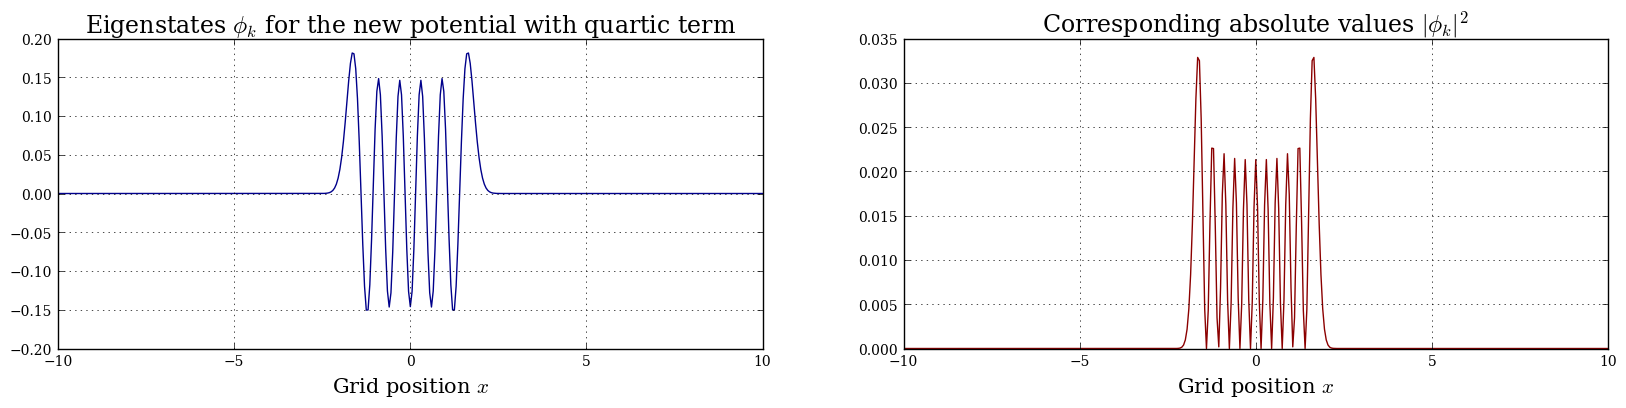

In [71]:
def eigenfunctions_quartic(k,const):
    #Diagonalize the Hamiltonian to solve the eigenvalue problem
    energies_quartic, states_quartic = np.linalg.eig(Hamiltonian_quartic(const))
    #Sorting the results
    energy_index_quartic = np.argsort(energies_quartic)
    
    plt.subplot(121)
    plt.plot(grid,states_quartic[:,energy_index_quartic[k]],color = 'darkblue')
    plt.title(r'Eigenstates $\phi_k$ for the new potential with quartic term' , size = 17)
    plt.xlabel('Grid position $x$',size = 15)
    plt.grid(True)
    
    plt.subplot(122)
    plt.plot(grid,np.abs(states_quartic[:,energy_index_quartic[k]])**2, color = 'darkred')
    plt.title(r'Corresponding absolute values $|\phi_k|^2$' , size = 17)
    plt.xlabel('Grid position $x$',size = 15)
    plt.grid(True)
    
    plt.show
    
interactive(eigenfunctions_quartic,k=(0,20),const=(0,10,1))

Try a double well:
$$
V(x)=-\frac{1}{2}x^2 + \lambda x^4
$$
What happens? Interpret your results.

In [72]:
def double_well(x,const):
    """
    We multiply the const. factor already with 0.1 because the impact of the x^4 term is so high, that we cannot 
    reach a good visibility of the double well potential, if we don't do this. The slider only allows us to see 
    changes in the second decimal.
    """
    return -0.5*x**2 + 0.1*const*x**4

def Hamiltonian_dw(const):
    maindiag = double_well(grid,const) + 1/delta_x**2
    nextdiag = -1/(2*delta_x**2)*np.ones(len(grid)-1)
    H = np.diag(maindiag) + np.diag(nextdiag,-1) + np.diag(nextdiag,1)
    return H

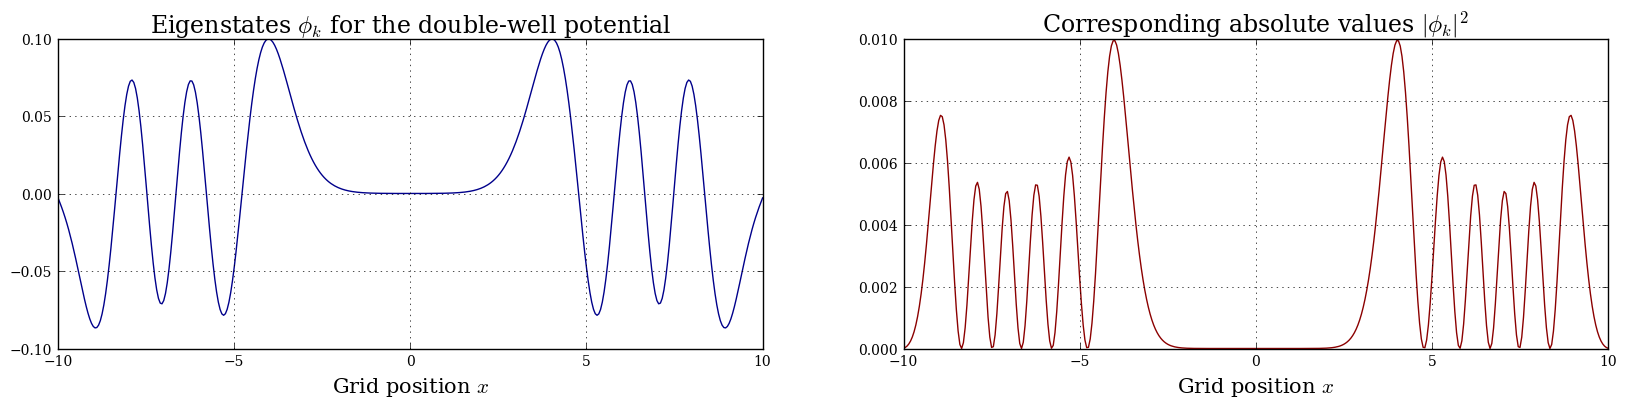

In [73]:
plt.rcParams["figure.figsize"][0] = 20


def eigenfunctions_dw(k,const):
    #Diagonalize the Hamiltonian to solve the eigenvalue problem
    energies_dw, states_dw = np.linalg.eig(Hamiltonian_dw(const))
    #Sorting the results
    energy_index_dw = np.argsort(energies_dw)
    
    plt.subplot(121)
    plt.plot(grid,states_dw[:,energy_index_dw[k]],color = 'darkblue')
    plt.title(r'Eigenstates $\phi_k$ for the double-well potential' , size = 17)
    plt.xlabel('Grid position $x$',size = 15)
    plt.grid(True)
    
    plt.subplot(122)
    plt.plot(grid,np.abs(states_dw[:,energy_index_dw[k]])**2, color = 'darkred')
    plt.title(r'Corresponding absolute values $|\phi_k|^2$' , size = 17)
    plt.xlabel('Grid position $x$',size = 15)
    plt.grid(True)
    
    plt.show
    
interactive(eigenfunctions_dw,k=(0,20),const=(0,0.1,0.01))

### Interpretation:
- For the first new potential (added $x^4$ term) we get a compression of the wave function in x- direction by increasing the value of the constant which is multiplied with the last term. The higher absolute value of the potential leads to a confinement of the particle in a smaller area around the center.

- For the double-well potential we find our particle located either on one of the two sides of the potential, for const = 0, because we have an unstable maximum of the potential at the center and therefore the particle is either on the left or the right end of the grid. For higher values of the constant factor, the $x^4$ term begins to dominate and we would see a "classic oscillation" as before. We chose our slider variable to be pretty small so that oen can see the probability distribution one would expect for the symmetric double well potential. 